# Visualize the Extracted Features

In [46]:
import sys
sys.path.append('../')

import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import soundfile as sf
import pyloudnorm as pyln
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.signal import spectrogram
from src.data.egfxset import load_egfxset

# plt.style.use('ggplot')
# plt.rcParams['font.size'] = 8
# plt.rcParams['figure.dpi'] = 100    
# plt.rcParams['grid.linewidth'] = 0.5
# plt.rcParams['grid.alpha'] = 0.5

pd.set_option('display.float_format', '{:.3f}'.format)
sns.set_style("whitegrid")
# cmap = sns.color_palette("coolwarm")

In [47]:
DATA_DIR = Path('../data/raw/')
RESULTS_DIR = Path('../data/features/')
PLOTS_DIR = Path('../docs/plots/')

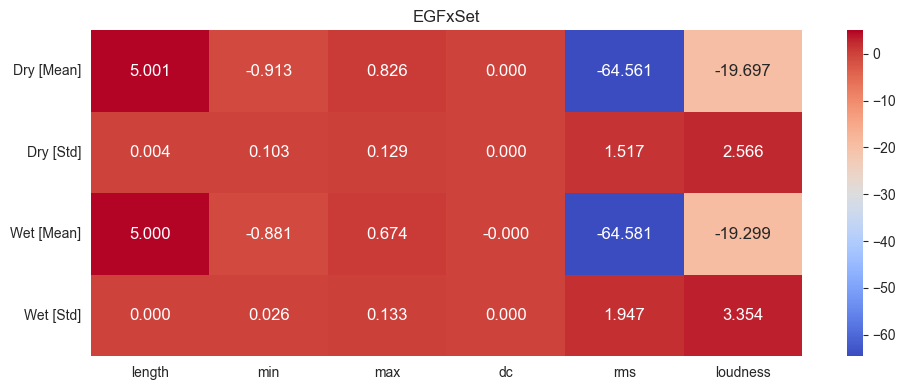

In [48]:
# Load the dry and wet sample dataframes
dry_csv_filename = Path(RESULTS_DIR) / "egfxset_dry.csv"
wet_csv_filename = Path(RESULTS_DIR) / "egfxset_wet.csv"

dry_df = pd.read_csv(dry_csv_filename, usecols=lambda col: col != 'file')
wet_df = pd.read_csv(wet_csv_filename, usecols=lambda col: col != 'file')

# Calculate mean and standard deviation for each file, per column
dry_mean = dry_df.mean()
wet_mean = wet_df.mean()
dry_std = dry_df.std()
wet_std = wet_df.std()

# Create a DataFrame with the specified row order
result_df = pd.DataFrame({
    'Dry [Mean]': dry_mean,
    'Dry [Std]': dry_std,
    'Wet [Mean]': wet_mean,
    'Wet [Std]': wet_std
})

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(result_df.T, annot=True, fmt='.3f', cmap="coolwarm", ax=ax, annot_kws={"size": 12})
plt.title('EGFxSet')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=0)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y-axis labels by 0 degrees
plt.tight_layout()
plt.show()

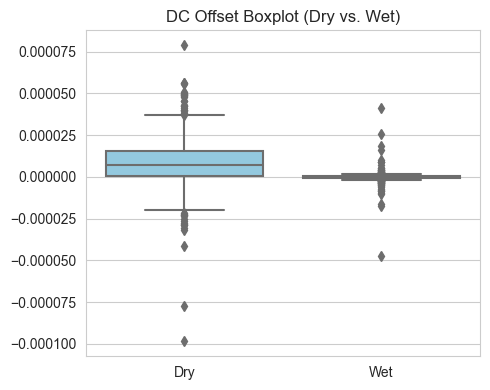

In [52]:
plt.figure(figsize=(5, 4))

# Plot boxplots for DC Offset column
sns.boxplot(data=[dry_df['dc'], wet_df['dc']], palette=['skyblue', 'salmon'])
plt.title('DC Offset Boxplot (Dry vs. Wet)')
plt.xticks([0, 1], ['Dry', 'Wet'])  # Set x-axis labels

plt.tight_layout()
plt.show()


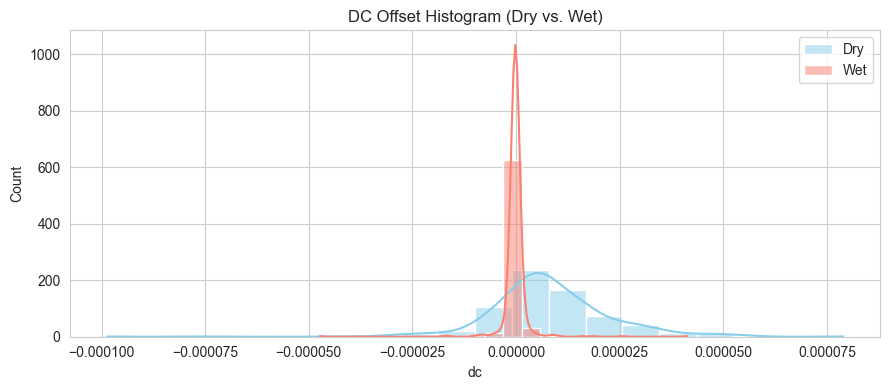

In [54]:
# Create a figure for the histogram
plt.figure(figsize=(9, 4))

# Plot histplots for DC Offset column
sns.histplot(data=dry_df, x='dc', bins=20, color='skyblue', kde=True, label='Dry')
sns.histplot(data=wet_df, x='dc', bins=20, color='salmon', kde=True, label='Wet')
plt.title('DC Offset Histogram (Dry vs. Wet)')
plt.legend()

plt.tight_layout()
plt.show()

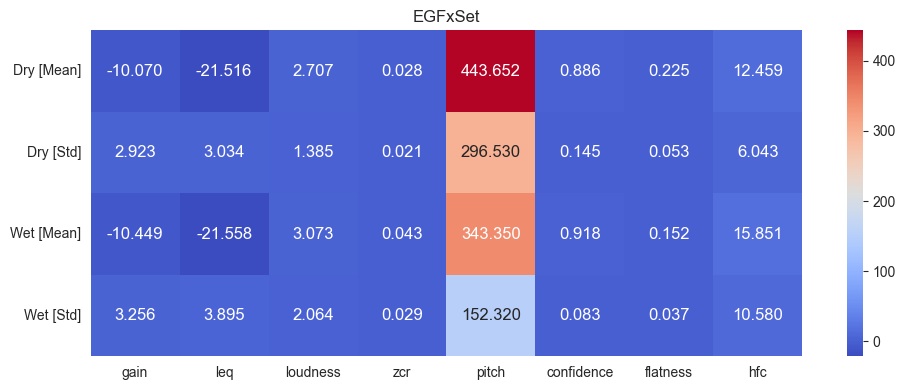

In [ ]:
# Load the dry and wet sample dataframes
dry_essentia_csv_filename = Path(RESULTS_DIR) / "egfxset_dry_essentia.csv"
wet_essentia_csv_filename = Path(RESULTS_DIR) / "egfxset_wet_essentia.csv"

dry_df = pd.read_csv(dry_essentia_csv_filename, usecols=lambda col: col != 'file')
wet_df = pd.read_csv(wet_essentia_csv_filename, usecols=lambda col: col != 'file')

# Calculate mean and standard deviation for each file, per column
dry_mean = dry_df.mean()
wet_mean = wet_df.mean()
dry_std = dry_df.std()
wet_std = wet_df.std()

# Create a DataFrame with the specified row order
result_df = pd.DataFrame({
    'Dry [Mean]': dry_mean,
    'Dry [Std]': dry_std,
    'Wet [Mean]': wet_mean,
    'Wet [Std]': wet_std
})

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(result_df.T, annot=True, fmt='.3f', cmap="coolwarm", ax=ax, annot_kws={"size": 12})
plt.title('EGFxSet')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=0)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=0)  # Rotate y-axis labels by 0 degrees
plt.tight_layout()
plt.show()